[View in Colaboratory](https://colab.research.google.com/github/Dark-Sied/Word_embeddings_experiments/blob/master/harry_potter_embeddings.ipynb)

In [0]:
!pip install gensim

    100% |████████████████████████████████| 23.6MB 1.3MB/s 
    100% |████████████████████████████████| 1.4MB 11.4MB/s 
    100% |████████████████████████████████| 133kB 19.8MB/s 
    100% |████████████████████████████████| 4.7MB 4.2MB/s 
    100% |████████████████████████████████| 61kB 20.1MB/s 
    100% |████████████████████████████████| 552kB 21.8MB/s 
  Running setup.py bdist_wheel for smart-open ... - \ done
  Stored in directory: /root/.cache/pip/wheels/23/00/44/e5b939f7a80c04e32297dbd6d96fa3065af89ecf57e2b5f89f
  Running setup.py bdist_wheel for bz2file ... - done
  Stored in directory: /root/.cache/pip/wheels/81/75/d6/e1317bf09bf1af5a30befc2a007869fa6e1f516b8f7c591cb9
Successfully built smart-open bz2file


In [0]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import re
from nltk.corpus import stopwords
from gensim.models import Word2Vec
import pandas as pd

In [0]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

%matplotlib inline

In [0]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
!git clone https://github.com/AmmarRashed/word_embeddings_hp.git

Cloning into 'word_embeddings_hp'...
remote: Enumerating objects: 76, done.
remote: Total 76 (delta 0), reused 0 (delta 0), pack-reused 76
Unpacking objects: 100% (76/76), done.


In [0]:
!ls

sample_data  word_embeddings_hp


In [0]:
%cd ./word_embeddings_hp/data/
!ls

/content/word_embeddings_hp/data
hp1.txt  hp2.txt  hp3.txt  hp4.txt  hp5.txt  hp6.txt  hp7.txt


In [0]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
stop_words = set(stopwords.words('english'))

In [0]:
ls = ["hp1.txt","hp2.txt","hp3.txt","hp4.txt","hp5.txt","hp6.txt", "hp7.txt"]

sent = []
for i in ls:
  with open(i) as f:
    text = f.readlines()
    for t in text:
      clean = re.sub(r'[^ a-z A-Z]','',t)
  #     print(clean)      
      a = sent_tokenize(clean)
      for j in a:
        sent.append(j)

    sent = list(filter(None, sent))
  #   print(sent)    
    english_df = pd.DataFrame(sent, columns = ["text"])
    english_df.to_csv("english_text.csv")

    

    words = [[w for w in s.lower().split() if w not in stop_words]for s in sent]
#     print(words)



In [0]:
print(words[:10])

[['harry', 'potter', 'sorcerers', 'stone'], ['chapter', 'one'], ['boy', 'lived'], ['mr', 'mrs', 'dursley', 'number', 'four', 'privet', 'drive', 'proud', 'say', 'perfectly', 'normal', 'thank', 'much', 'last', 'people', 'youd', 'expect', 'involved', 'anything', 'strange', 'mysterious', 'didnt', 'hold', 'nonsense'], ['mr', 'dursley', 'director', 'firm', 'called', 'grunnings', 'made', 'drills', 'big', 'beefy', 'man', 'hardly', 'neck', 'although', 'large', 'mustache', 'mrs', 'dursley', 'thin', 'blonde', 'nearly', 'twice', 'usual', 'amount', 'neck', 'came', 'useful', 'spent', 'much', 'time', 'craning', 'garden', 'fences', 'spying', 'neighbors', 'dursleys', 'small', 'son', 'called', 'dudley', 'opinion', 'finer', 'boy', 'anywhere'], ['dursleys', 'everything', 'wanted', 'also', 'secret', 'greatest', 'fear', 'somebody', 'would', 'discover', 'didnt', 'think', 'could', 'bear', 'anyone', 'found', 'potters', 'mrs', 'potter', 'mrs', 'dursleys', 'sister', 'hadnt', 'met', 'several', 'years', 'fact', 'm

In [0]:
model = Word2Vec(words, min_count = 500, size = 100, window = 20, workers = 4)
print(model)

Word2Vec(vocab=171, size=100, alpha=0.025)


In [0]:
model.most_similar("dumbledore")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('boy', 0.8922559022903442),
 ('snape', 0.8796478509902954),
 ('voldemort', 0.8790592551231384),
 ('must', 0.8400474190711975),
 ('years', 0.808477520942688),
 ('death', 0.7843430638313293),
 ('first', 0.7778301239013672),
 ('would', 0.7720270752906799),
 ('dark', 0.7650457620620728),
 ('sirius', 0.7638968229293823)]

In [0]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []
  
    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


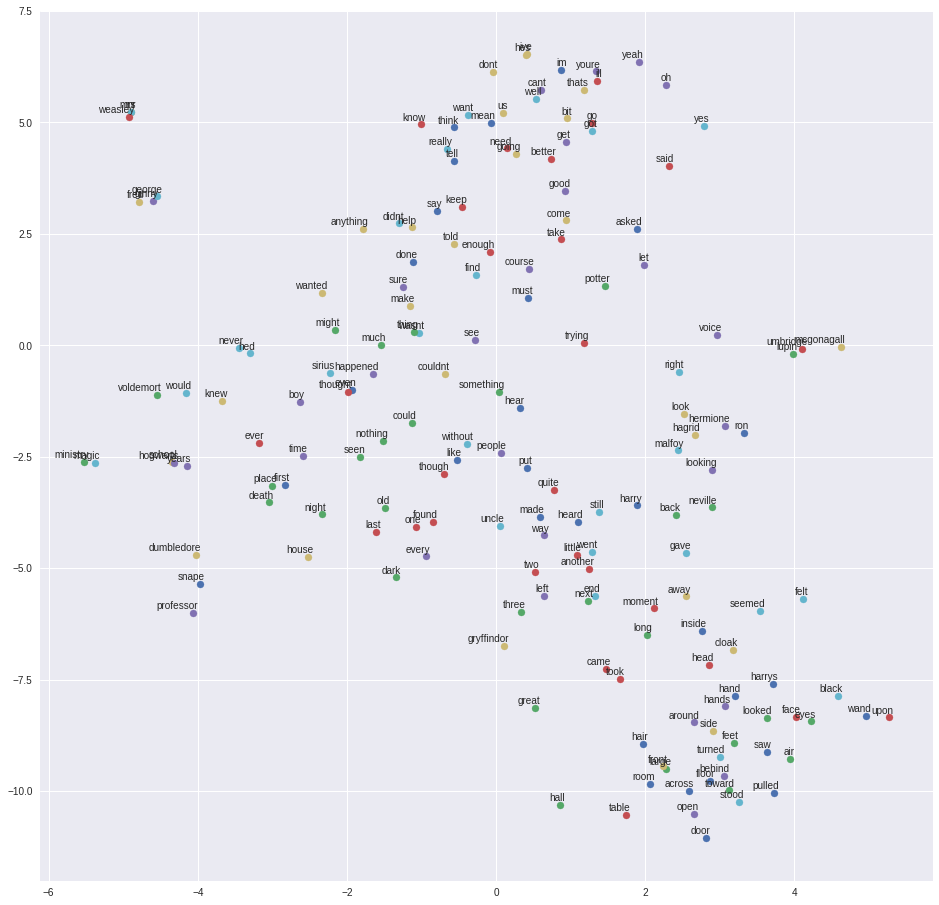

In [0]:
tsne_plot(model)

In [0]:
model2 = Word2Vec(words, min_count = 200, size = 100, window = 20, workers = 4)
print(model2)

Word2Vec(vocab=548, size=100, alpha=0.025)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


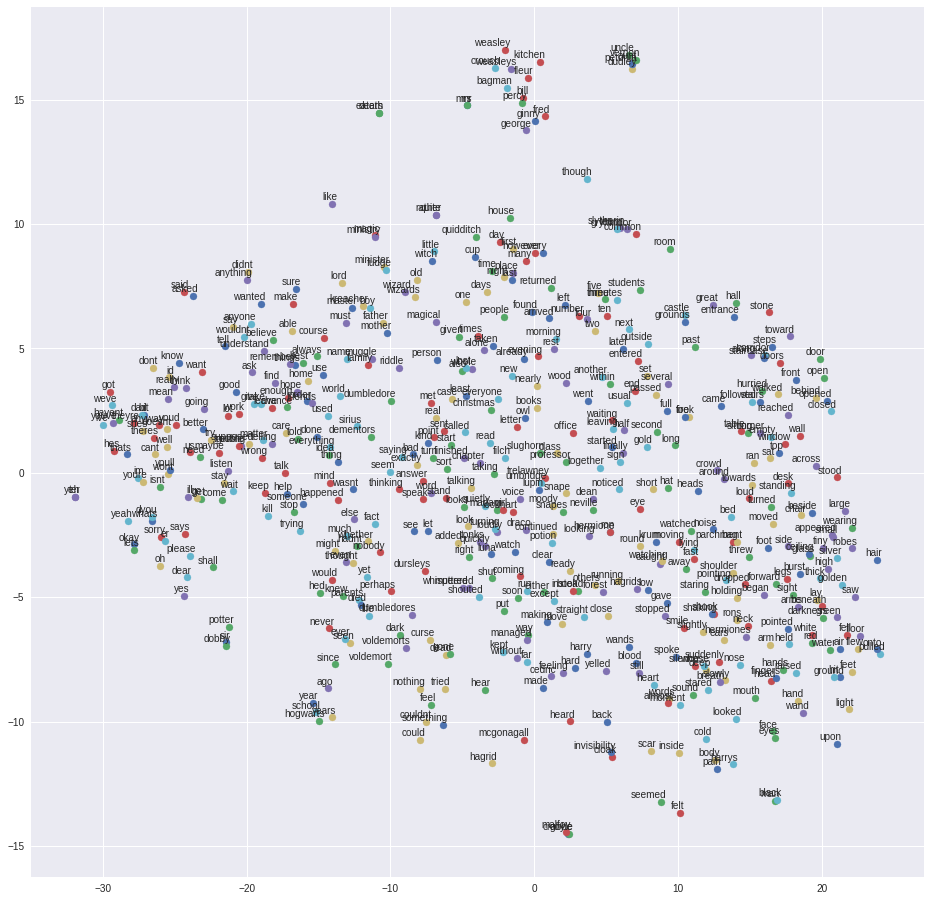

In [0]:
tsne_plot(model2)

In [0]:
model2.most_similar("professor")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('class', 0.6758096814155579),
 ('continued', 0.5944473147392273),
 ('snape', 0.5836447477340698),
 ('office', 0.5685755014419556),
 ('moody', 0.5522972345352173),
 ('snapes', 0.5313922166824341),
 ('slughorn', 0.5187267065048218),
 ('shall', 0.5123778581619263),
 ('trelawney', 0.5012408494949341),
 ('umbridge', 0.46446067094802856)]